INSTAGRAM DATASETS

In [2]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
#loading the dataset
data = pd.read_csv("C:/Users/DELL/Downloads/train.csv")

In [4]:
data.head()  # Display the first few rows of the dataset

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.0,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.0,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.0,0,0,0,1,13,159,98,0
3,1,0.00,1,0.0,0,82,0,0,679,414,651,0
4,1,0.00,2,0.0,0,0,0,1,6,151,126,0


In [5]:
data.info()  # Get a concise summary of the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           576 non-null    int64  
 1   nums/length username  576 non-null    float64
 2   fullname words        576 non-null    int64  
 3   nums/length fullname  576 non-null    float64
 4   name==username        576 non-null    int64  
 5   description length    576 non-null    int64  
 6   external URL          576 non-null    int64  
 7   private               576 non-null    int64  
 8   #posts                576 non-null    int64  
 9   #followers            576 non-null    int64  
 10  #follows              576 non-null    int64  
 11  fake                  576 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 54.1 KB


In [6]:
#total no. of records in the dataset

print(f"Total records and fields in the dataset:",data.shape)

Total records and fields in the dataset: (576, 12)


HANDLING MISSING VALUES

In [7]:
#no. of missing values in each column
print("Missing values in each column:")
print(data.isnull().sum())


Missing values in each column:
profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64


THERE IS AN ABSENCE OF MISSING VALUES IN EACH FIELD OF THE WHOLE DATASET

NOW , FEATURE ENGINEERING

In [8]:
#unique values in each column
print("Unique values in each column:")
for column in data.columns:
    print(f"{column}: {data[column].nunique()} unique values")

Unique values in each column:
profile pic: 2 unique values
nums/length username: 54 unique values
fullname words: 9 unique values
nums/length fullname: 25 unique values
name==username: 2 unique values
description length: 104 unique values
external URL: 2 unique values
private: 2 unique values
#posts: 193 unique values
#followers: 372 unique values
#follows: 400 unique values
fake: 2 unique values


 Columns Overview:
 ● profile_pic: Binary (1 if the profile has a picture, 0 otherwise).
 ● nums/length username: Number of characters or numbers in the username.
 ● fullname words: Number of words in the full name.
 ● nums/length fullname: Character length and number count in the full name.
 ● name==username: Binary (1 if the username and full name are identical, 0
 otherwise).
 ● description length: Character length of the bio/description.
 ● external URL: Binary (1 if an external URL is present, 0 otherwise).
 ● private: Binary (1 if the profile is private, 0 otherwise).
 ● #posts: Number of posts.
 ● #followers: Number of followers.
 ● #follows: Number of accounts followed.
 ● fake: Target label (1 if fake, 0 if genuine)

In [9]:
#values count in categorical columns 
print(data['fake'].value_counts())
print(data['private'].value_counts())
print(data['name==username'].value_counts())
print(data['profile pic'].value_counts())


fake
0    288
1    288
Name: count, dtype: int64
private
0    356
1    220
Name: count, dtype: int64
name==username
0    556
1     20
Name: count, dtype: int64
profile pic
1    404
0    172
Name: count, dtype: int64


HERE, 0 & 1 ARE BINARY LABELS GIVEN TO EACH CATEGORICAL COLUMNS FOR SIGNIFYING YES AS '0' AND NO AS '1'

NOW, EDA

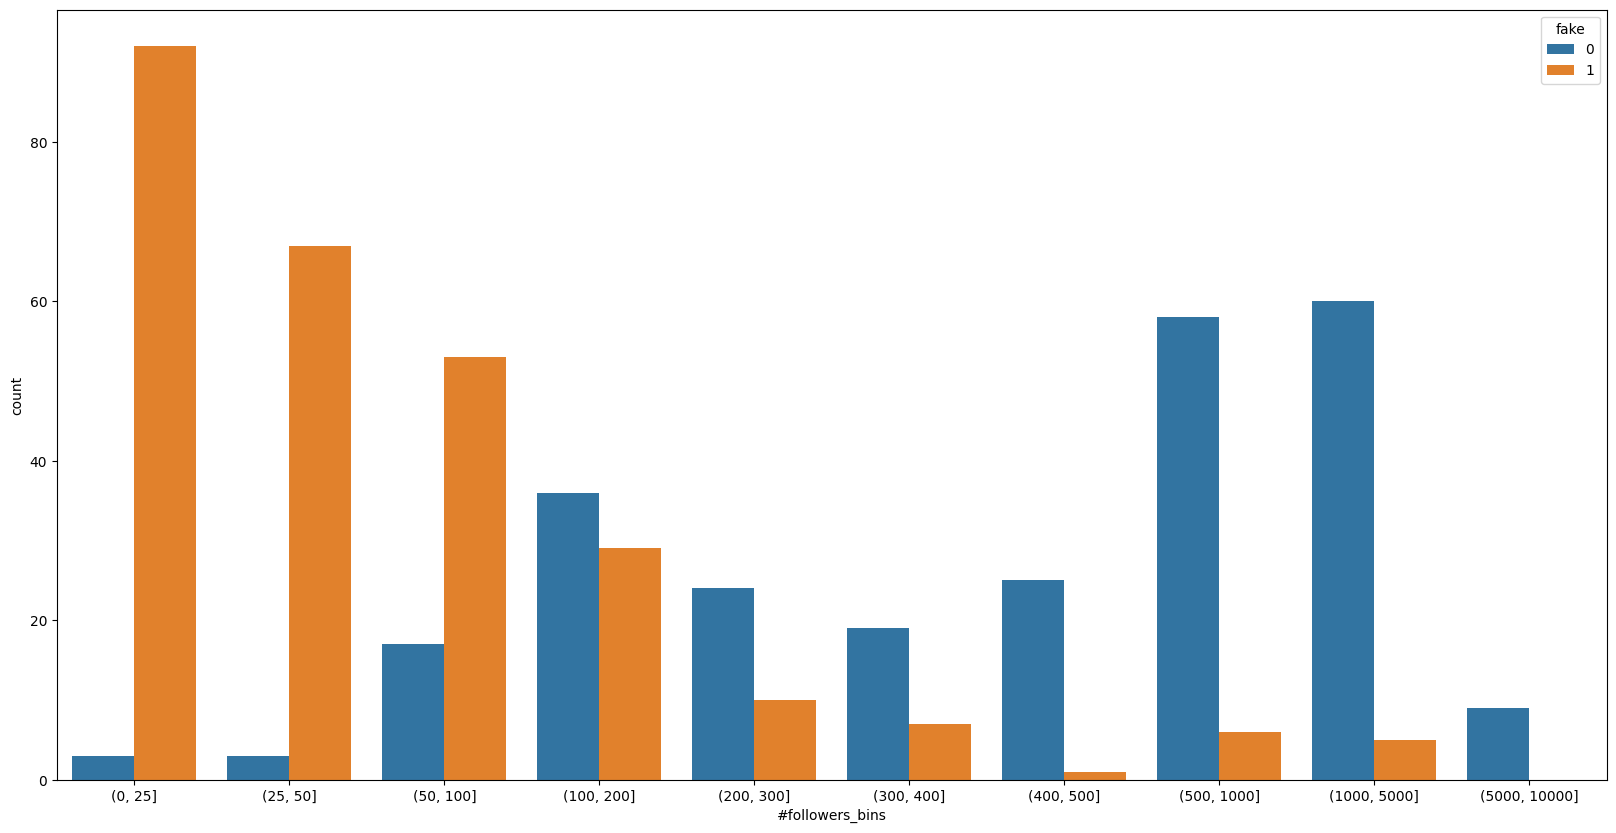

In [17]:
# create bins for #followers column
bins = [0, 25, 50, 100, 200, 300, 400, 500, 1000, 5000, 10000]
# cut the #followers column into the bins
data['#followers_bins'] = pd.cut(data['#followers'],bins=bins)
# plot #followers with bins and show fake value counts
plt.figure(figsize=(20,10))
sns.countplot(x='#followers_bins', hue='fake', data=data)
plt.show()

MORE FOLLOWERS IMPLIES TO LESS PROBABILITY OF ACCOUNT BEING FAKE

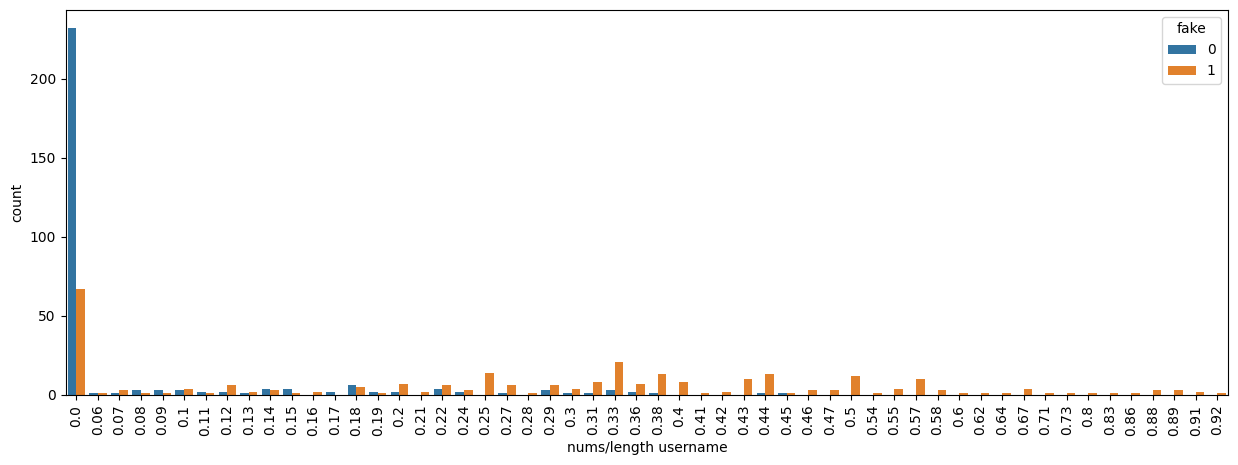

In [25]:
# plot nums/length username and show fake value counts
plt.figure(figsize=(15,5))
sns.countplot(x='nums/length username', hue='fake',data=data)
plt.xticks(rotation = 90)
plt.show()

LESS NUMS/LENGTH OF USERNAME , MORE PROBABLE IT IT GENIUNE ACCOUNT

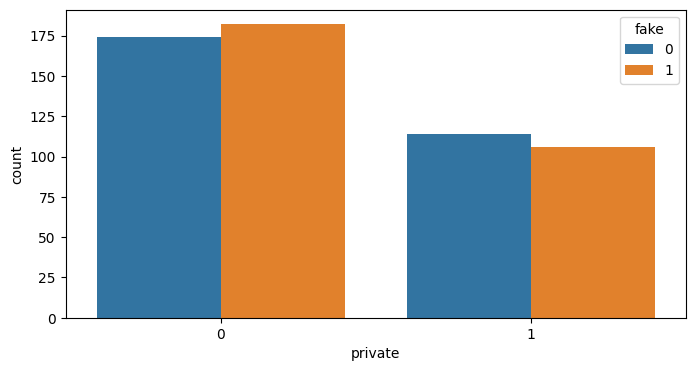

In [30]:
# how is fake distributed amongst private accounts
plt.figure(figsize=(8,4))
sns.countplot(x='private', hue='fake', data=data)
plt.show()

PRIVATE ACCOUNT HAVE MORE PROBABILITY TO BE GENIUNE 